In [1]:
!pip install scikit-learn==0.24
import sklearn
print(sklearn.__version__)


0.24.0


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools

from sklearn import decomposition
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

In [3]:
df = pd.read_csv("./train.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
print(df.columns)
print(len(df.columns))

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# for column in df.columns:
#   df[column].value_counts().plot(kind='bar',title=column,figsize=(10,10))
#   plt.show()

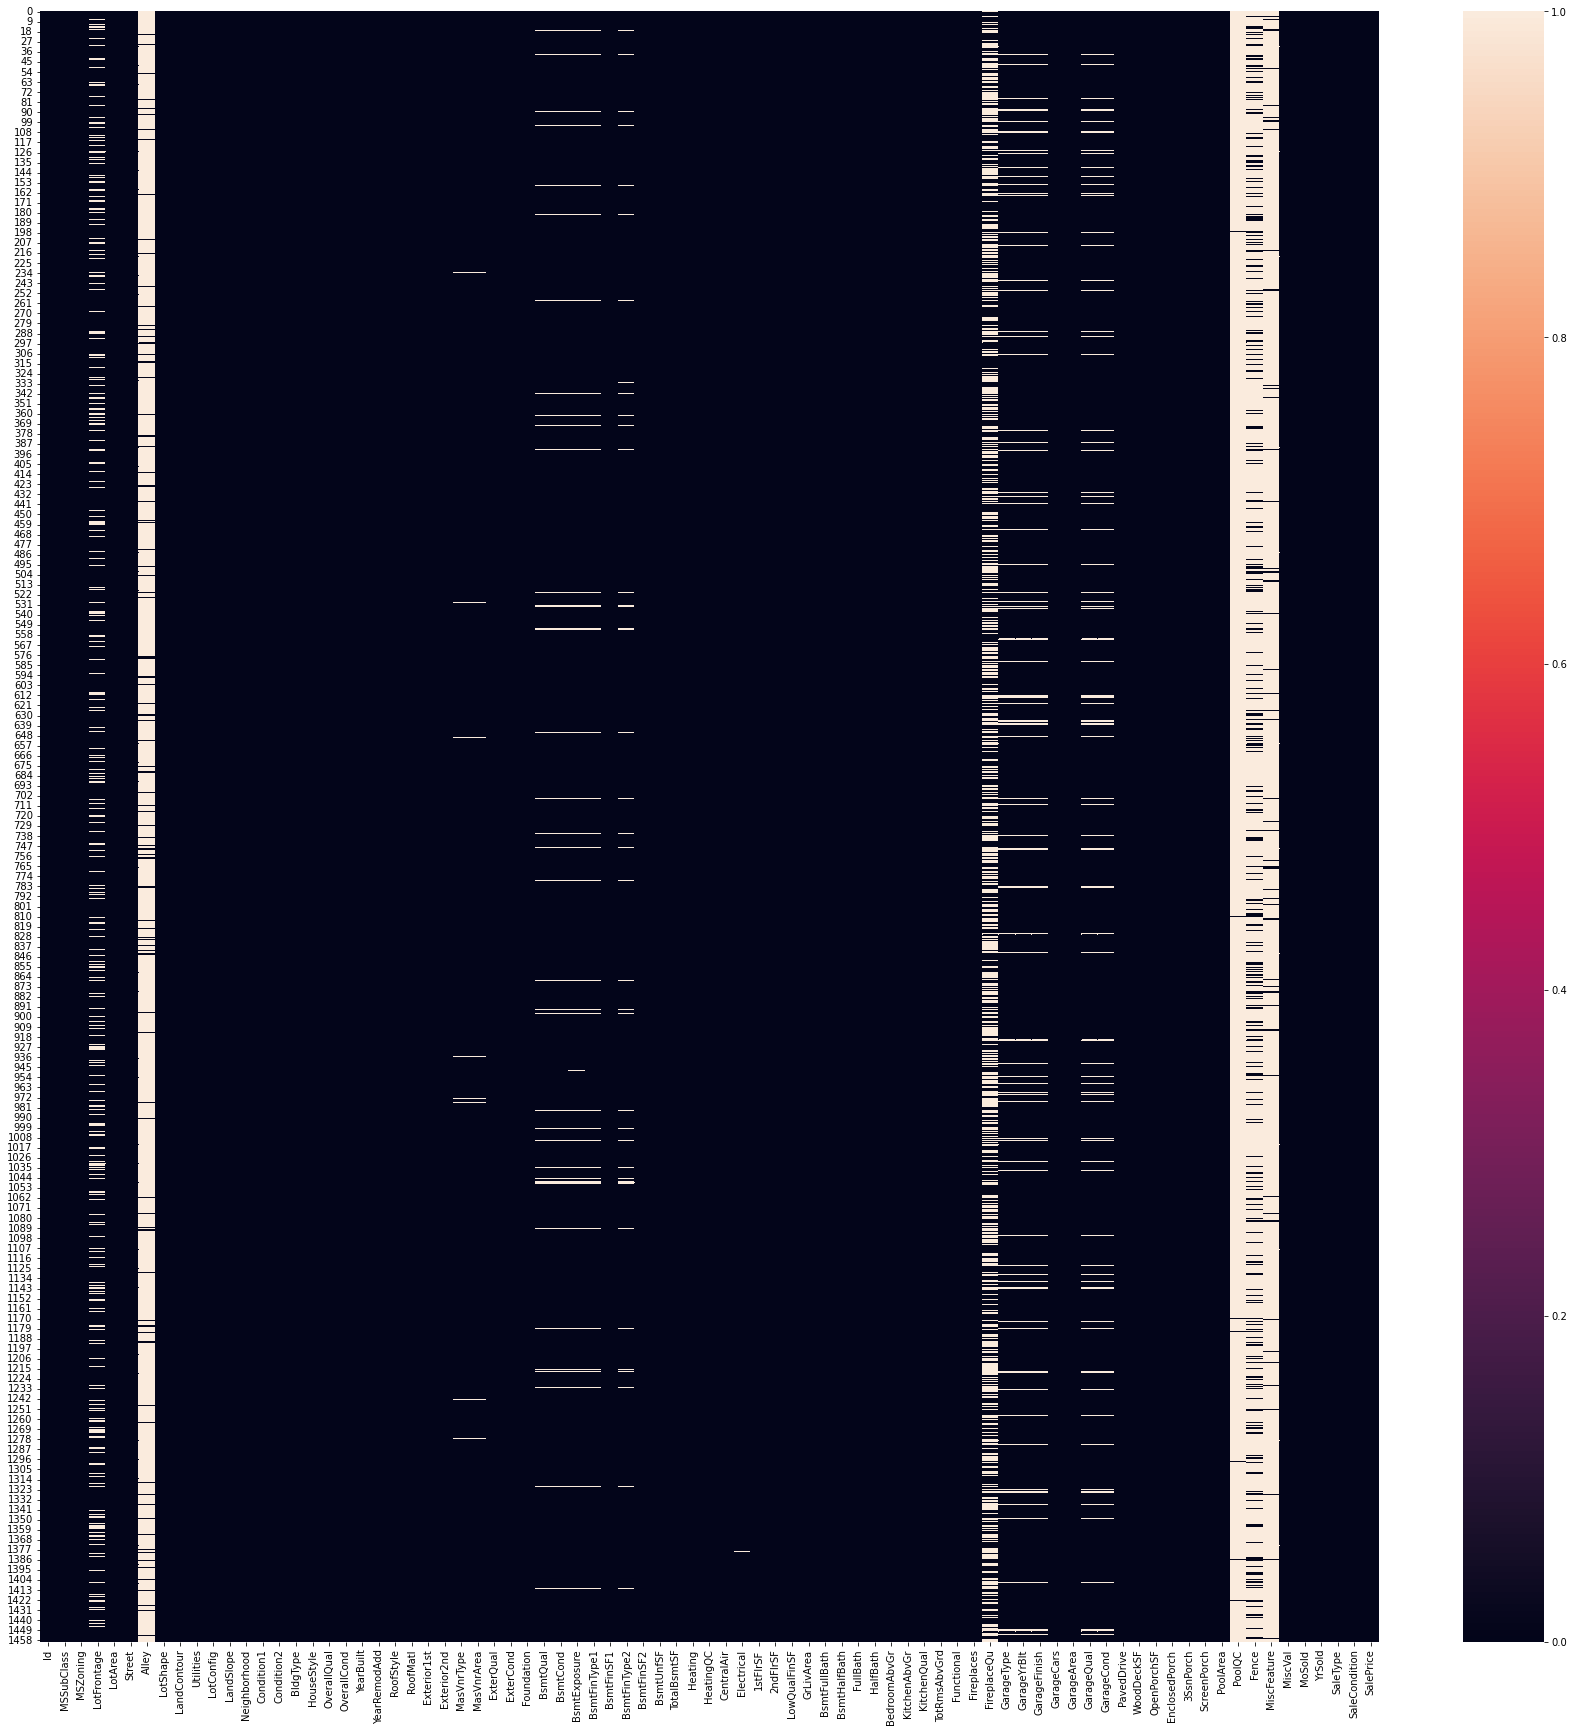

In [8]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(df.isnull(), ax=ax)

In [9]:
# Fill null vallues
df["Alley"] = df["Alley"].fillna("NA") # NA = No alley access
df["MasVnrType"] = df["MasVnrType"].fillna("None") # Empty values might be None

df["BsmtQual"] = df["BsmtQual"].fillna("NA") # NA = No basement
df.loc[(df["BsmtQual"]=="NA"),'BsmtCond'] = "NA" # NA = No basement
df.loc[(df["BsmtQual"]=="NA"),'BsmtExposure'] = "NA" # NA = No basement
df.loc[(df["BsmtQual"]=="NA"),'BsmtFinType1'] = "NA" # NA = No basement
df.loc[(df["BsmtQual"]=="NA"),'BsmtFinType2'] = "NA" # NA = No basement

df["FireplaceQu"] = df["FireplaceQu"].fillna("NA") # NA = No fireplace

df["GarageType"] = df["GarageType"].fillna("NA") # NA = No garage
df.loc[(df["GarageType"]=="NA"),'GarageFinish'] = "NA" # NA = No garage
df.loc[(df["GarageType"]=="NA"),'GarageQual'] = "NA" # NA = No garage
df.loc[(df["GarageType"]=="NA"),'GarageCond'] = "NA" # NA = No garage
df.loc[(df["GarageType"]=="NA"),'GarageYrBlt'] = 0


df["PoolQC"] = df["PoolQC"].fillna("NA") # NA = No pool
df["Fence"] = df["Fence"].fillna("NA") # NA = No fence
df["MiscFeature"] = df["MiscFeature"].fillna("NA") # NA = No misc feature

df.loc[(df["Exterior2nd"]=="Wd Shng"),'Exterior2nd'] = 'Wd Sdng'
df.loc[(df["Exterior2nd"]=="CmentBd"),'Exterior2nd'] = 'CemntBd'
df.loc[(df["Exterior2nd"]=="Brk Cmn"),'Exterior2nd'] = 'BrkComm'


df[df.select_dtypes(exclude="object").columns] = df[df.select_dtypes(exclude="object").columns].apply(lambda x: x.fillna(x.mean()),axis=0)

df = df.dropna()

ordinals = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC','Functional']
labels = {
    "MSSubClass":[20,30,40,45,50,60,70,75,80,85,90,120,150,160,180,190],
    "MSZoning":["A","C (all)",'FV',"I","RH","RL","RP","RM"],
    "Street":["Grvl","Pave"],
    "Alley":["Grvl","Pave","NA"],
    "LotShape":["Reg","IR1","IR2","IR3"],
    "LandContour":["Lvl","Bnk","HLS","Low"],
    "Utilities":["AllPub","NoSewr","NoSeWa","ELO"],
    "LotConfig":["Inside","Corner","CulDSac","FR2","FR3"],
    "LandSlope":["Gtl","Mod","Sev"],
    "Neighborhood":["Blmngtn","Blueste","BrDale","BrkSide","ClearCr","CollgCr","Crawfor","Edwards","Gilbert","IDOTRR","MeadowV","Mitchel","NAmes","NoRidge","NPkVill","NridgHt","NWAmes","OldTown","SWISU","Sawyer","SawyerW","Somerst","StoneBr","Timber","Veenker"],
    "Condition1":["Artery","Feedr","Norm","RRNn","RRAn","PosN","PosA","RRNe","RRAe"],
    "Condition2":["Artery","Feedr","Norm","RRNn","RRAn","PosN","PosA","RRNe","RRAe"],
    "BldgType":["1Fam","2fmCon","Duplex","TwnhsE","Twnhs"],
    "HouseStyle":["1Story","1.5Fin","1.5Unf","2Story","2.5Fin","2.5Unf","SFoyer","SLvl"],
    "OverallQual":[[10,10],[9,9],[8,8],[7,7],[6,6],[5,5],[4,4],[3,3],[2,2],[1,1]], #ordinal
    "OverallCond":[[10,10],[9,9],[8,8],[7,7],[6,6],[5,5],[4,4],[3,3],[2,2],[1,1]], #ordinal
    "RoofStyle":["Flat","Gable","Gambrel","Hip","Mansard","Shed"],
    "RoofMatl":["ClyTile","CompShg","Membran","Metal","Roll","Tar&Grv","WdShake","WdShngl"],
    "Exterior1st":["AsbShng","AsphShn","BrkComm","BrkFace","CBlock","CemntBd","HdBoard","ImStucc","MetalSd","Other","Plywood","PreCast","Stone","Stucco","VinylSd","Wd Sdng","WdShing"],
    "Exterior2nd":["AsbShng","AsphShn","BrkComm","BrkFace","CBlock","CemntBd","HdBoard","ImStucc","MetalSd","Other","Plywood","PreCast","Stone","Stucco","VinylSd","Wd Sdng","WdShing"],
    "MasVnrType":["BrkCmn","BrkFace","CBlock","None","Stone"],
    "ExterQual":[["Ex",5],["Gd",4],["TA",3],["Fa",2],["Po",1]], #ordinal
    "ExterCond":[["Ex",5],["Gd",4],["TA",3],["Fa",2],["Po",1]], #ordinal
    "Foundation":["BrkTil","CBlock","PConc","Slab","Stone","Wood"],
    "BsmtQual":[["Ex",5],["Gd",4],["TA",3],["Fa",2],["Po",1],["NA",0]],#ordinal
    "BsmtCond":[["Ex",5],["Gd",4],["TA",3],["Fa",2],["Po",1],["NA",0]], #ordinal
    "BsmtExposure":[["Gd",4],["Av",3],["Mn",2],["No",1],["NA",0]], #ordinal
    "BsmtFinType1":["GLQ","ALQ","BLQ","Rec","LwQ","Unf","NA"],
    "BsmtFinType2":["GLQ","ALQ","BLQ","Rec","LwQ","Unf","NA"],
    "Heating":["Floor","GasA","GasW","Grav","OthW","Wall"],
    "HeatingQC":[["Ex",5],["Gd",4],["TA",3],["Fa",2],["Po",1]], #ordinal
    "CentralAir":["N","Y"],
    "Electrical":["SBrkr","FuseA","FuseF","FuseP","Mix"],
    "KitchenQual":[["Ex",5],["Gd",4],["TA",3],["Fa",2],["Po",1]], #ordinal
    "Functional":[["Typ",7],["Min1",6],["Min2",5],["Mod",4],["Maj1",3],["Maj2",2],["Sev",1],["Sal",0]], #ordinal
    "FireplaceQu":[["Ex",5],["Gd",4],["TA",3],["Fa",2],["Po",1],["NA",0]], #ordinal
    "GarageType":["2Types","Attchd","Basment","BuiltIn","CarPort","Detchd","NA"],
    "GarageFinish":["Fin","RFn","Unf","NA"],
    "GarageQual":[["Ex",5],["Gd",4],["TA",3],["Fa",2],["Po",1],["NA",0]], #ordinal
    "GarageCond":[["Ex",5],["Gd",4],["TA",3],["Fa",2],["Po",1],["NA",0]], #ordinal
    "PavedDrive":["Y","P","N"],
    "PoolQC":[["Ex",4],["Gd",3],["TA",2],["Fa",1],["NA",0]], #ordinal
    "Fence":["GdPrv","MnPrv","GdWo","MnWw","NA"],
    "MiscFeature":["Elev","Gar2","Othr","Shed","TenC","NA"],
}

X = df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal']]# 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'
y = df['SalePrice'].values.ravel()

In [10]:
encoders = {}

def encode_column(X):
    print(X._name)
    print(X.unique())
    if X._name in ordinals:
      enc = OrdinalEncoder()
      enc.fit(np.array(labels[X._name]).reshape(-1,1))
    else:
      enc = LabelEncoder()
      enc.fit(labels[X._name])
    encoders[X._name]=enc
    res = None
    if X._name in ordinals:
      res= enc.transform(X.values.reshape(-1,1)).reshape(1,-1)[0]
    else:
      res= enc.transform(X)
    return res
    

X[X.select_dtypes(include="object").columns] = X[X.select_dtypes(include="object").columns].apply(lambda x: encode_column(x),axis=0)
#X[X.select_dtypes(include="object").columns].apply(lambda x: encode_column(x),axis=0)

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
Street
['Pave' 'Grvl']
Alley
['NA' 'Grvl' 'Pave']
LotShape
['Reg' 'IR1' 'IR2' 'IR3']
LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
Utilities
['AllPub' 'NoSeWa']
LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope
['Gtl' 'Mod' 'Sev']
Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st
['VinylSd' 'MetalSd

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
iso = IsolationForest(contamination=0.10)
yhat = iso.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]

In [13]:
print(X_train)

      MSSubClass  MSZoning  LotFrontage  ...  Fence  MiscFeature  MiscVal
254           20         5    70.000000  ...      4            2        0
1364         160         2    30.000000  ...      4            2        0
637          190         6    50.000000  ...      4            2        0
975          160         2    70.049958  ...      4            2        0
515           20         5    94.000000  ...      4            2        0
...          ...       ...          ...  ...    ...          ...      ...
1046          60         5    85.000000  ...      4            2        0
1097         120         5    70.049958  ...      4            2        0
1296          20         5    80.000000  ...      2            2        0
861          190         5    75.000000  ...      4            2        0
1128          60         5    59.000000  ...      4            2        0

[1048 rows x 75 columns]


In [14]:
for column in X_train.columns:
    print(column)
    print(X_train[column].value_counts())
    print("Null values",len(X_train[df[column].isnull()]))
    print("All values",len(X_train[column]))
    print()

MSSubClass
20     401
60     224
50     100
120     69
160     51
30      48
80      45
70      34
90      27
85      16
190     13
45       8
180      5
75       5
40       2
Name: MSSubClass, dtype: int64
Null values 0
All values 1048

MSZoning
5    842
6    144
2     51
4      9
1      2
Name: MSZoning, dtype: int64
Null values 0
All values 1048

LotFrontage
70.049958     190
60.000000      93
80.000000      52
70.000000      51
50.000000      44
             ... 
128.000000      1
152.000000      1
118.000000      1
106.000000      1
129.000000      1
Name: LotFrontage, Length: 99, dtype: int64
Null values 0
All values 1048

LotArea
7200     19
9600     16
6000     14
8400     11
1680      7
         ..
9638      1
10125     1
3363      1
9505      1
10240     1
Name: LotArea, Length: 807, dtype: int64
Null values 0
All values 1048

Street
1    1046
0       2
Name: Street, dtype: int64
Null values 0
All values 1048

Alley
1    991
0     32
2     25
Name: Alley, dtype: int64
Null va

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Null values 0
All values 1048

Heating
1    1036
2       6
3       4
5       1
0       1
Name: Heating, dtype: int64
Null values 0
All values 1048

HeatingQC
5.0    550
9.0    288
7.0    179
6.0     30
8.0      1
Name: HeatingQC, dtype: int64
Null values 0
All values 1048

CentralAir
1    1010
0      38
Name: CentralAir, dtype: int64
Null values 0
All values 1048

Electrical
4    980
0     51
1     15
3      1
2      1
Name: Electrical, dtype: int64
Null values 0
All values 1048

1stFlrSF
864     18
1040    11
912     11
894      9
848      8
        ..
1282     1
1283     1
1284     1
1285     1
2053     1
Name: 1stFlrSF, Length: 597, dtype: int64
Null values 0
All values 1048

2ndFlrSF
0      612
728      9
720      6
504      6
672      6
      ... 
874      1
873      1
870      1
855      1
769      1
Name: 2ndFlrSF, Length: 307, dtype: int64
Null values 0
All values 1048

LowQualFinSF
0      1037
80        3
528       1
514       1
420       1
390       1
360       1
232       1


In [15]:
df.select_dtypes(exclude="object").describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000
mean,730.177076,56.904598,70.041139,10514.875086,6.098147,5.576527,1971.201098,1984.825669,103.596762,443.781743,46.316404,566.402196,1056.500343,1162.742622,346.691146,5.856555,1515.290323,0.425532,0.057653,1.564173,0.382292,2.866163,1.046671,6.516815,0.612903,1868.461222,1.765957,472.750172,94.271105,46.690460,21.999314,3.416609,15.091970,2.764585,43.578586,6.323267,2007.816060,180851.713109
std,421.533043,42.328676,22.042684,9991.102244,1.383022,1.113638,30.198042,20.647515,180.661219,455.923021,161.077790,441.355558,435.161900,386.598834,436.624577,48.672424,525.959072,0.518987,0.238984,0.551129,0.502783,0.816595,0.220555,1.626919,0.644971,454.122864,0.747336,213.750334,125.436671,66.289084,61.173949,29.347109,55.810633,40.218482,496.629946,2.702098,1.328239,79477.020244
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,366.000000,20.000000,60.000000,7540.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,796.000000,882.000000,0.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,330.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,730.000000,50.000000,70.049958,9473.000000,6.000000,5.000000,1972.000000,1994.000000,0.000000,384.000000,0.000000,476.000000,992.000000,1088.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.000000,70.000000,79.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,164.000000,712.000000,0.000000,808.000000,1298.000000,1391.000000,728.000000,0.000000,1779.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# EDA

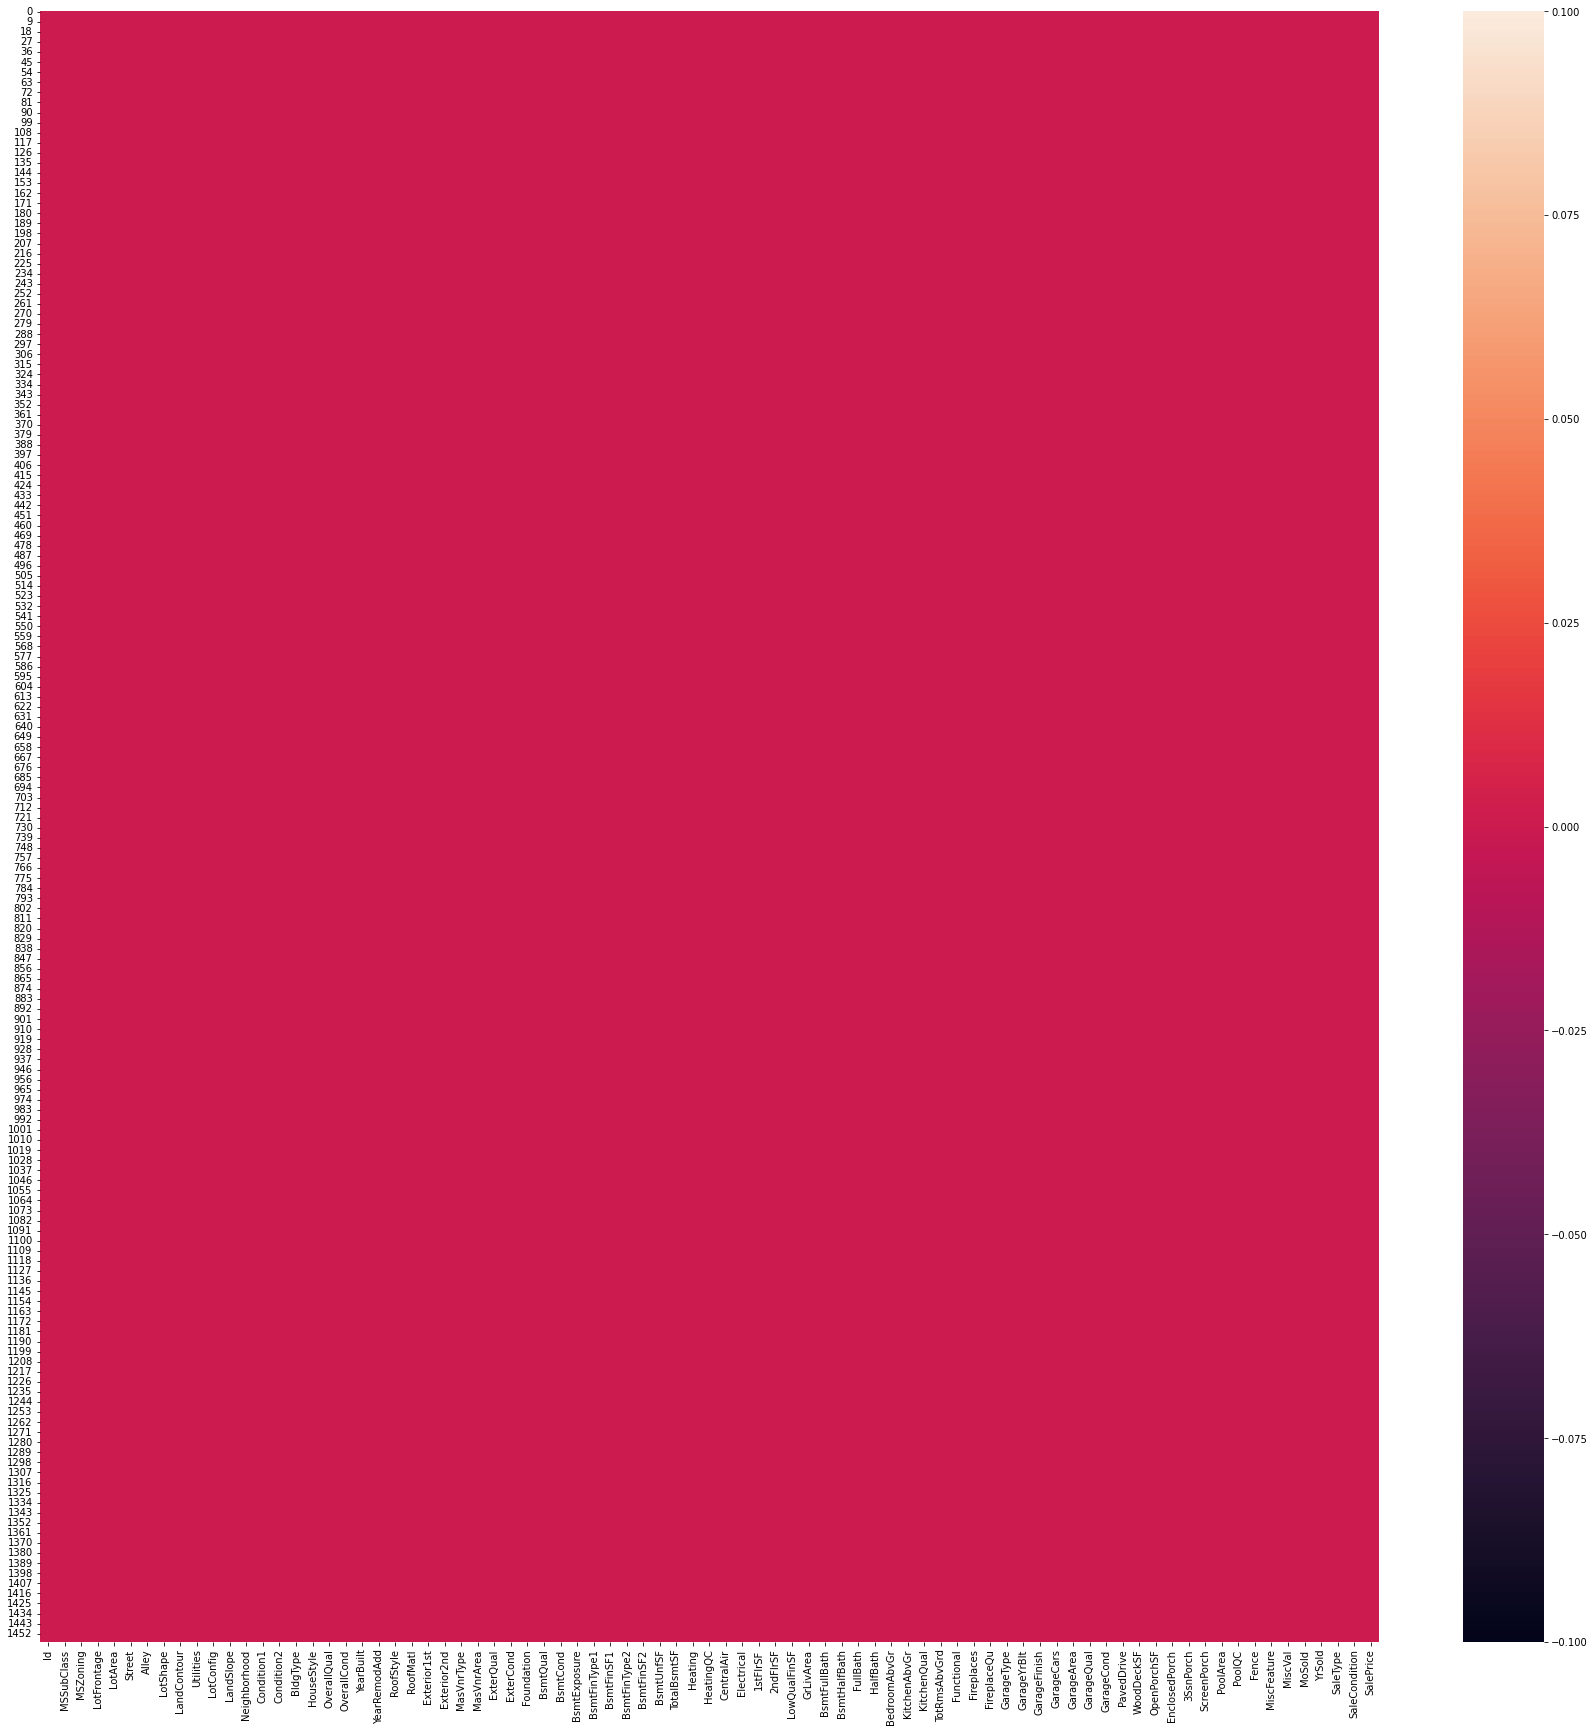

In [16]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(df.isnull(), ax=ax)

a

In [17]:
pca = decomposition.PCA(n_components=0.999999,svd_solver="full")#0.9999
pca.fit(X)
print(len(X.columns),len(pca.components_))


75 21


In [18]:
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)

In [19]:
from sklearn import svm,tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression

# from sklearn.model_selection import cross_val_score

regr = RandomForestRegressor()
print(regr.get_params())

parameters = {
    "GradientBoostingRegressor":{
      'loss': ['ls'],
      'learning_rate': [0.1], 
      'n_estimators': [250,500,750,1000,2000,5000,10000],
    },
    "RandomForestRegressor":{
      'max_depth': [None]+list(range(5,31,5)), 
      'n_estimators': list(range(75,151,25)),
    },
    "VotingRegressor":{},
}

def create_model(model_type,params):
  if type(params) is dict:
    params = list(params.values())
  if model_type == "GradientBoostingRegressor":
    return GradientBoostingRegressor(
        loss=params[0],
        learning_rate=params[1],
        n_estimators=params[2],
        max_features="sqrt",
        random_state=42
    )
  elif model_type == "RandomForestRegressor":
    return RandomForestRegressor(
        criterion="mse",
        max_features="sqrt",
        max_depth=params[0],
        n_estimators=params[1],
        random_state=42
    )
  elif model_type == "VotingRegressor":
    return VotingRegressor([("gb", GradientBoostingRegressor(
        max_features="sqrt",
        random_state=42
    )), ("rf", RandomForestRegressor(
        criterion="mse",
        max_features="sqrt",
    ))])

def train_with_grid_search(X_train,X_val,y_train,y_val):
  best_model_type = ""
  best_score = 0
  best_model = None
  best_parameters = {}
  for model_type in parameters:
    grid_search = list(itertools.product(*parameters[model_type].values()))
    print("Grid search:",len(grid_search))
    for params in grid_search:
      regr = create_model(model_type,params)
      regr.fit(X_train, y_train)
      score = regr.score(X_val, y_val)
      text = ""
      for i in range(len(params)):
        text+=f"{list(parameters[model_type].keys())[i]}: {params[i]}, "
      print(model_type,text,"score:",score)
      
      if score>best_score:
        print(model_type,"New best score",score)
        print()
        best_model_type=model_type
        best_score=score
        best_model=regr
        for i in range(len(params)):
          best_parameters[list(parameters[model_type].keys())[i]]=params[i]
  return best_model_type,best_score,best_model,best_parameters

best_model_type,best_score,best_model,best_parameters = train_with_grid_search(X_train,X_val,y_train,y_val)
print("Best model:",best_model_type,best_parameters,"score:",best_score)
print("=====")
best_model_type_pca,best_score_pca,best_model_pca,best_parameters_pca = train_with_grid_search(X_train_pca,X_val_pca,y_train,y_val)
print("Best model pca:",best_model_type_pca,best_parameters_pca,"score:",best_score_pca)


{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Grid search: 7
GradientBoostingRegressor loss: ls, learning_rate: 0.1, n_estimators: 250,  score: 0.900459467739956
GradientBoostingRegressor New best score 0.900459467739956

GradientBoostingRegressor loss: ls, learning_rate: 0.1, n_estimators: 500,  score: 0.9000958182696176
GradientBoostingRegressor loss: ls, learning_rate: 0.1, n_estimators: 750,  score: 0.9012592969579724
GradientBoostingRegressor New best score 0.9012592969579724

GradientBoostingRegressor loss: ls, learning_rate: 0.1, n_estimators: 1000,  score: 0.9006492993069588
GradientBoostingRegressor loss: ls, learning_rate: 0.1, n_